In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import visualizer
import os
import missingno
from collections import Counter
import wordcloud
import emoji
import string
import nltk
import re

In [2]:
print(os.getcwd())

C:\Users\Mukul\Jupyter Notebook Files\PythonPractice_Files\Other_Folders\Spam Classifier - Project


In [3]:
os.chdir("G://Excel")

In [4]:
df = pd.read_csv("spam.csv", encoding = 'latin-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1, inplace = True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.columns = ["class", "message"]

In [9]:
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df["len"] = [len(text) for text in df.message]

In [11]:
df.groupby("class").describe()

len                                                         
        count        mean        std   min    25%    50%    75%    max
class                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

It seems that the message are bit longer in the spam class as comapred to ham also spam message are less as compared to ham which clearly indicated the class imbalance in our data which we need to fix but we will going to cover this in our later pre-processing steps.

In [12]:
df["class"].value_counts()/df["class"].shape[0]*100

ham     86.593683
spam    13.406317
Name: class, dtype: float64

In [13]:
df.head()

,class,message,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
stopword_list = nltk.corpus.stopwords.words("english")

In [15]:
tokener = nltk.word_tokenize

In [16]:
common_words = {"word": [], "count": []}

for word in df["message"]:
    tok = tokener(word)
    m_counter = Counter(tok)
    common_words["word"].append(m_counter.most_common(1)[0][0])
    common_words["count"].append(m_counter.most_common(1)[0][1])

In [17]:
common_words_df = pd.concat([df, pd.DataFrame(common_words)], axis = 1)

In [18]:
words_cloud = wordcloud.WordCloud().generate_from_text(' '.join(common_words_df["word"]))

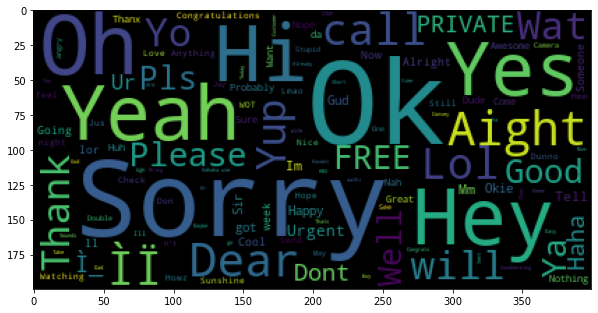

In [19]:
plt.figure(figsize=(10,6))
plt.imshow(words_cloud)

In [20]:
df = df.drop("len", axis = 1)

In [21]:
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df.message = df.message.apply(str.lower)

In [23]:
def remove_whitespace(text):
    
    clean_words = re.sub(string.whitespace, " ", text)
    
    return clean_words

df.message = df.message.apply(remove_whitespace)

In [24]:
def remove_punch(text):
    
    rm_punch = str(text).translate(str.maketrans(" ", " ", string.punctuation))
    
    return rm_punch

df.message = df.message.apply(remove_punch)

In [25]:
df.message[4]

'nah i dont think he goes to usf he lives around here though'

In [26]:
def remove_stopwords(text):
    
    tok_word = tokener(text)
    
    clean_words = []
    
    for word in tok_word:
        if word in stopword_list:
            continue
        else:
            clean_words.append(word)
    words = ' '.join(clean_words)
    return words

In [27]:
df.message = df.message.apply(remove_stopwords)

In [28]:
ham_class = df[df["class"] == "ham"]
spam_class = df[df["class"] == "spam"]

In [29]:
ham_text = ' '.join(ham_class.message)
spam_text = ' '.join(spam_class.message)

In [30]:
ham_wordcloud = wordcloud.WordCloud().generate_from_text(ham_text)
spam_wordcloud = wordcloud.WordCloud().generate_from_text(spam_text)

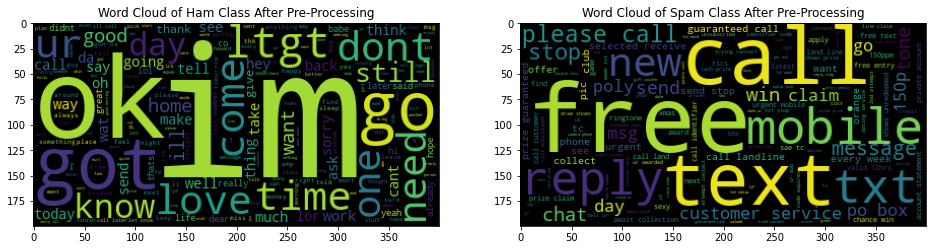

In [31]:
plt.figure(figsize=(16,12))
plt.subplot(121)
plt.title("Word Cloud of Ham Class After Pre-Processing")
plt.imshow(ham_wordcloud)
plt.subplot(122)
plt.title("Word Cloud of Spam Class After Pre-Processing")
plt.imshow(spam_wordcloud)

In [32]:
def remove_digits(text):
    
    clean_text = str(text).translate(str.maketrans("", "", string.digits))
    
    return clean_text

In [33]:
df.message = df.message.apply(remove_digits)

In [34]:
df.message[2]

'free entry  wkly comp win fa cup final tkts st may  text fa  receive entry questionstd txt ratetcs apply overs'

In [35]:
remove_whitespace(df.message[2])

'free entry  wkly comp win fa cup final tkts st may  text fa  receive entry questionstd txt ratetcs apply overs'

In [36]:
def remove_extraspace(text):
    
    clean_text = re.sub(r"\s+", " ", text)
    
    return clean_text

In [37]:
df.message = df.message.apply(remove_extraspace)

In [38]:
lm = nltk.WordNetLemmatizer()

In [39]:
def lemma(text):
    
    tok_word = tokener(text)
    
    lemma_word = []
    
    for tok in tok_word:
        lemma_tok = lm.lemmatize(tok)
        lemma_word.append(lemma_tok)
        
    return ' '.join(lemma_word)

In [40]:
df["lemma_message"] = df.message.apply(lemma)

In [41]:
df.head(5)

,class,message,lemma_message
0,ham,go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though,nah dont think go usf life around though


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
final_df = df.iloc[:, [0, 2]]

In [44]:
X = df.iloc[:, 1]
y = df.iloc[:, 0]

In [45]:
from sklearn.preprocessing import LabelBinarizer

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
lb = LabelBinarizer()

In [48]:
scaled_y = lb.fit_transform(y)

In [49]:
tf_idf = TfidfVectorizer(ngram_range=(1,3))

In [50]:
scaled_x = tf_idf.fit_transform(X)

In [51]:
import sklearn
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [52]:
from sklearn.model_selection import StratifiedKFold

In [53]:
kfold= StratifiedKFold(n_splits= 10)

In [ ]:
sklearn.metrics.accuracy_score

In [264]:
def evaluate_model(y_train, y_test, y_train_predict, y_test_predict):
    
    print("*******Accuracy*******\n")
    
    train_accuracy = sklearn.metrics.accuracy_score(y_train, y_train_predict)
    test_accuracy = sklearn.metrics.accuracy_score(y_test, y_test_predict)
    
    print("Train Accuracy: %s" %(train_accuracy))
    print("Test Accuracy: %s" %(test_accuracy))
    
    train_error = 1-train_accuracy
    test_error = 1-test_accuracy
    
    print("\n")
    print("Train Error: %s" %(train_error))
    print("Test Error: %s" %(test_error))
    
    print("\n******* F1-Score **********")
    
    train_f1_score = sklearn.metrics.f1_score(y_train, y_train_predict)
    test_f1_score = sklearn.metrics.f1_score(y_test, y_test_predict)
    
    print("\n")
    print("Train F1-Score: %s" %(train_f1_score))
    print("Test F1-Score: %s" %(test_f1_score))
    
    print("\n********* Log Loss ***********")
    train_log_loss = sklearn.metrics.log_loss(y_train, y_train_predict)
    test_log_loss = sklearn.metrics.log_loss(y_test, y_test_predict)
    
    print("\n")
    print("Train Log Loss: %s" %(train_log_loss))
    print("Test Log Loss: %s" %(test_log_loss))
    
    print("\n********* Classification Report *********")
    train_cf_report = pd.DataFrame(sklearn.metrics.classification_report(y_train, y_train_predict, output_dict = True))
    test_cf_report = pd.DataFrame(sklearn.metrics.classification_report(y_test, y_test_predict, output_dict = True))
    
    print("\n")
    print("Train Classification Report:")
    print(train_cf_report)
    print("Test Classification Report:")
    print(test_cf_report)
    
    print("\n********* F-Beta Score ********")
    train_fbeta_score = sklearn.metrics.fbeta_score(y_train, y_train_predict, beta = 0.5)
    test_fbeta_score = sklearn.metrics.fbeta_score(y_test, y_test_predict, beta = 0.5)
    
    print("\n")
    print("Train FBeta Score: %s" %(train_fbeta_score))
    print("Test FBeta Score: %s" %(test_fbeta_score))
    
    print("\n******** Confustion Matrix *********")
    train_conf_mtx = sklearn.metrics.confusion_matrix(y_train, y_train_predict)
    test_conf_mtx = sklearn.metrics.confusion_matrix(y_test, y_test_predict)
    
    print("\n")
    print("Train Confusion Matrix:")
    print(train_conf_mtx)
    print("Test Confusion Matrix:")
    print(test_conf_mtx)

## Logistic Regression

In [55]:
lr_train_accuracy = []
lr_test_accuracy = []
lr_train_f1_score = []
lr_test_f1_score = []

for train_idx, test_idx in kfold.split(scaled_x, scaled_y):
    x_train, x_test, y_train, y_test = scaled_x[train_idx], scaled_x[test_idx], scaled_y[train_idx], scaled_y[test_idx]
    lr = LogisticRegression(random_state = 42)
    lr.fit(x_train, y_train)
    train_predict = lr.predict(x_train)
    test_predict = lr.predict(x_test)
    
    train_accu = sklearn.metrics.accuracy_score(y_train, train_predict)
    test_accu = sklearn.metrics.accuracy_score(y_test, test_predict)
    
    train_f1 = sklearn.metrics.f1_score(y_train, train_predict)
    test_f1 = sklearn.metrics.f1_score(y_test, test_predict)
    
    lr_train_accuracy.append(train_accu)
    lr_test_accuracy.append(test_accu)
    lr_train_f1_score.append(train_f1)
    lr_test_f1_score.append(test_f1)

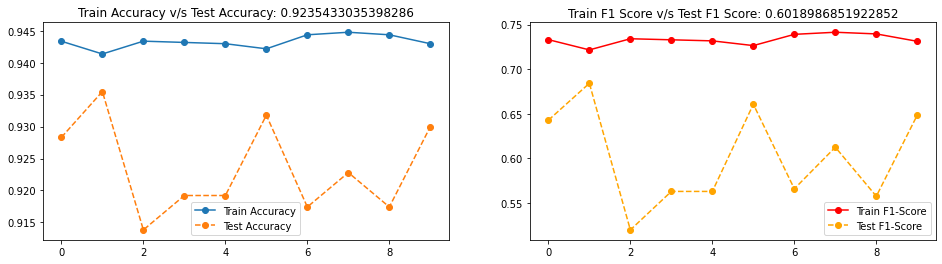

In [56]:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.title("Train Accuracy v/s Test Accuracy: %s" %(np.mean(lr_test_accuracy)))
plt.plot(lr_train_accuracy, marker = "o")
plt.plot(lr_test_accuracy, marker = "o", linestyle = "--")
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.subplot(122)
plt.title("Train F1 Score v/s Test F1 Score: %s" %(np.mean(lr_test_f1_score)))
plt.plot(lr_train_f1_score, marker = "o", color = "r")
plt.plot(lr_test_f1_score,  marker = "o", linestyle = "--", color = "orange")
plt.legend(["Train F1-Score", "Test F1-Score"])

## K-Nearest Neighbor

In [57]:
knn_train_accuracy = []
knn_test_accuracy = []
knn_train_f1_score = []
knn_test_f1_score = []

for train_idx, test_idx in kfold.split(scaled_x, scaled_y):
    x_train, x_test, y_train, y_test = scaled_x[train_idx], scaled_x[test_idx], scaled_y[train_idx], scaled_y[test_idx]
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    train_predict = knn.predict(x_train)
    test_predict = knn.predict(x_test)
    
    train_accu = sklearn.metrics.accuracy_score(y_train, train_predict)
    test_accu = sklearn.metrics.accuracy_score(y_test, test_predict)
    
    train_f1 = sklearn.metrics.f1_score(y_train, train_predict)
    test_f1 = sklearn.metrics.f1_score(y_test, test_predict)
    
    knn_train_accuracy.append(train_accu)
    knn_test_accuracy.append(test_accu)
    knn_train_f1_score.append(train_f1)
    knn_test_f1_score.append(test_f1)

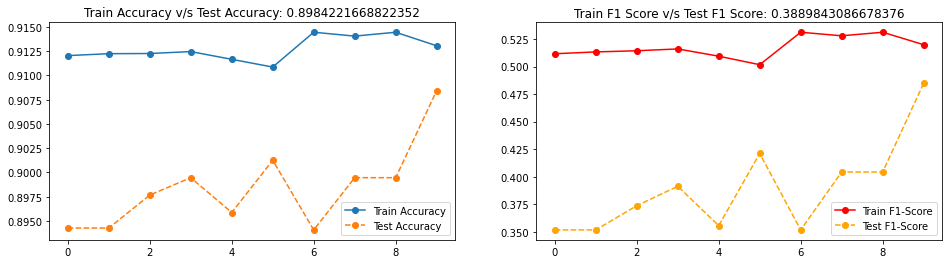

In [58]:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.title("Train Accuracy v/s Test Accuracy: %s" %(np.mean(knn_test_accuracy)))
plt.plot(knn_train_accuracy, marker = "o")
plt.plot(knn_test_accuracy, marker = "o", linestyle = "--")
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.subplot(122)
plt.title("Train F1 Score v/s Test F1 Score: %s" %(np.mean(knn_test_f1_score)))
plt.plot(knn_train_f1_score, marker = "o", color = "r")
plt.plot(knn_test_f1_score,  marker = "o", linestyle = "--", color = "orange")
plt.legend(["Train F1-Score", "Test F1-Score"])

## Decision Trees

In [59]:
dt_train_accuracy = []
dt_test_accuracy = []
dt_train_f1_score = []
dt_test_f1_score = []

for train_idx, test_idx in kfold.split(scaled_x, scaled_y):
    x_train, x_test, y_train, y_test = scaled_x[train_idx], scaled_x[test_idx], scaled_y[train_idx], scaled_y[test_idx]
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(x_train, y_train)
    train_predict = dt.predict(x_train)
    test_predict = dt.predict(x_test)
    
    train_accu = sklearn.metrics.accuracy_score(y_train, train_predict)
    test_accu = sklearn.metrics.accuracy_score(y_test, test_predict)
    
    train_f1 = sklearn.metrics.f1_score(y_train, train_predict)
    test_f1 = sklearn.metrics.f1_score(y_test, test_predict)
    
    dt_train_accuracy.append(train_accu)
    dt_test_accuracy.append(test_accu)
    dt_train_f1_score.append(train_f1)
    dt_test_f1_score.append(test_f1)

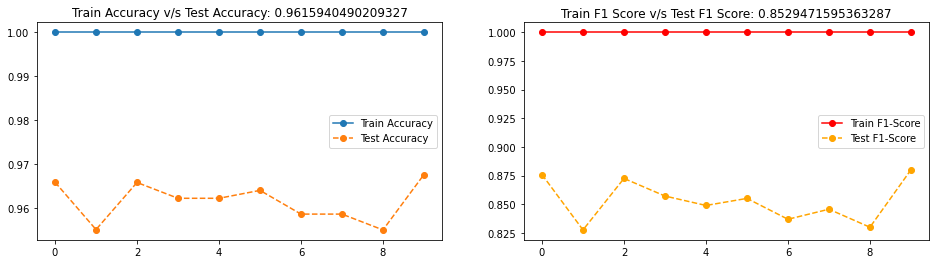

In [60]:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.title("Train Accuracy v/s Test Accuracy: %s" %(np.mean(dt_test_accuracy)))
plt.plot(dt_train_accuracy, marker = "o")
plt.plot(dt_test_accuracy, marker = "o", linestyle = "--")
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.subplot(122)
plt.title("Train F1 Score v/s Test F1 Score: %s" %(np.mean(dt_test_f1_score)))
plt.plot(dt_train_f1_score, marker = "o", color = "r")
plt.plot(dt_test_f1_score,  marker = "o", linestyle = "--", color = "orange")
plt.legend(["Train F1-Score", "Test F1-Score"])

## Light GBM Classifier

In [61]:
lgbm_train_accuracy = []
lgbm_test_accuracy = []
lgbm_train_f1_score = []
lgbm_test_f1_score = []

for train_idx, test_idx in kfold.split(scaled_x, scaled_y):
    x_train, x_test, y_train, y_test = scaled_x[train_idx], scaled_x[test_idx], scaled_y[train_idx], scaled_y[test_idx]
    lgbm = LGBMClassifier(random_state=42)
    lgbm.fit(x_train, y_train)
    train_predict = lgbm.predict(x_train)
    test_predict = lgbm.predict(x_test)
    
    train_accu = sklearn.metrics.accuracy_score(y_train, train_predict)
    test_accu = sklearn.metrics.accuracy_score(y_test, test_predict)
    
    train_f1 = sklearn.metrics.f1_score(y_train, train_predict)
    test_f1 = sklearn.metrics.f1_score(y_test, test_predict)
    
    lgbm_train_accuracy.append(train_accu)
    lgbm_test_accuracy.append(test_accu)
    lgbm_train_f1_score.append(train_f1)
    lgbm_test_f1_score.append(test_f1)

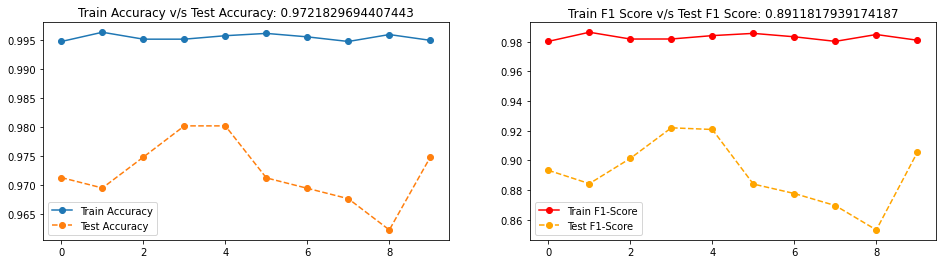

In [62]:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.title("Train Accuracy v/s Test Accuracy: %s" %(np.mean(lgbm_test_accuracy)))
plt.plot(lgbm_train_accuracy, marker = "o")
plt.plot(lgbm_test_accuracy, marker = "o", linestyle = "--")
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.subplot(122)
plt.title("Train F1 Score v/s Test F1 Score: %s" %(np.mean(lgbm_test_f1_score)))
plt.plot(lgbm_train_f1_score, marker = "o", color = "r")
plt.plot(lgbm_test_f1_score,  marker = "o", linestyle = "--", color = "orange")
plt.legend(["Train F1-Score", "Test F1-Score"])

## XGBoost Classifier

In [63]:
xgb_train_accuracy = []
xgb_test_accuracy = []
xgb_train_f1_score = []
xgb_test_f1_score = []

for train_idx, test_idx in kfold.split(scaled_x, scaled_y):
    x_train, x_test, y_train, y_test = scaled_x[train_idx], scaled_x[test_idx], scaled_y[train_idx], scaled_y[test_idx]
    xgb = XGBClassifier(random_state=42)
    xgb.fit(x_train, y_train)
    train_predict = xgb.predict(x_train)
    test_predict = xgb.predict(x_test)
    
    train_accu = sklearn.metrics.accuracy_score(y_train, train_predict)
    test_accu = sklearn.metrics.accuracy_score(y_test, test_predict)
    
    train_f1 = sklearn.metrics.f1_score(y_train, train_predict)
    test_f1 = sklearn.metrics.f1_score(y_test, test_predict)
    
    xgb_train_accuracy.append(train_accu)
    xgb_test_accuracy.append(test_accu)
    xgb_train_f1_score.append(train_f1)
    xgb_test_f1_score.append(test_f1)

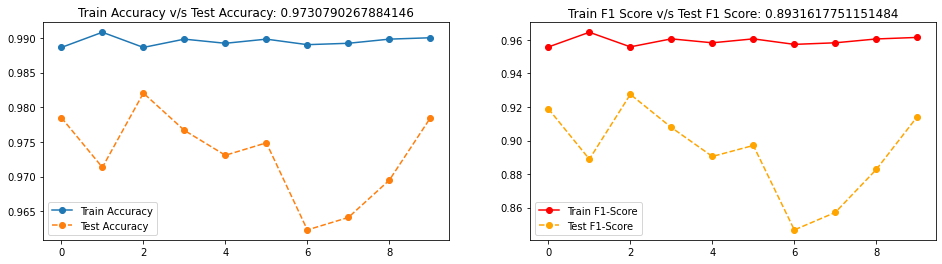

In [64]:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.title("Train Accuracy v/s Test Accuracy: %s" %(np.mean(xgb_test_accuracy)))
plt.plot(xgb_train_accuracy, marker = "o")
plt.plot(xgb_test_accuracy, marker = "o", linestyle = "--")
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.subplot(122)
plt.title("Train F1 Score v/s Test F1 Score: %s" %(np.mean(xgb_test_f1_score)))
plt.plot(xgb_train_f1_score, marker = "o", color = "r")
plt.plot(xgb_test_f1_score,  marker = "o", linestyle = "--", color = "orange")
plt.legend(["Train F1-Score", "Test F1-Score"])

## Multinomial Naive Bayes

In [65]:
multinom_train_accuracy = []
multinom_test_accuracy = []
multinom_train_f1_score = []
multinom_test_f1_score = []

for train_idx, test_idx in kfold.split(scaled_x, scaled_y):
    x_train, x_test, y_train, y_test = scaled_x[train_idx], scaled_x[test_idx], scaled_y[train_idx], scaled_y[test_idx]
    multinom = MultinomialNB()
    multinom.fit(x_train, y_train)
    train_predict = multinom.predict(x_train)
    test_predict = multinom.predict(x_test)
    
    train_accu = sklearn.metrics.accuracy_score(y_train, train_predict)
    test_accu = sklearn.metrics.accuracy_score(y_test, test_predict)
    
    train_f1 = sklearn.metrics.f1_score(y_train, train_predict)
    test_f1 = sklearn.metrics.f1_score(y_test, test_predict)
    
    multinom_train_accuracy.append(train_accu)
    multinom_test_accuracy.append(test_accu)
    multinom_train_f1_score.append(train_f1)
    multinom_test_f1_score.append(test_f1)

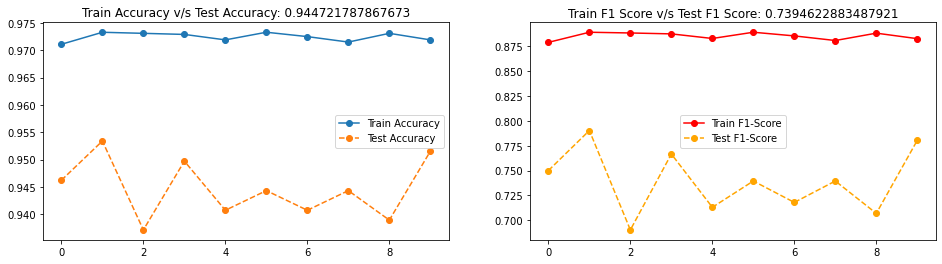

In [66]:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.title("Train Accuracy v/s Test Accuracy: %s" %(np.mean(multinom_test_accuracy)))
plt.plot(multinom_train_accuracy, marker = "o")
plt.plot(multinom_test_accuracy, marker = "o", linestyle = "--")
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.subplot(122)
plt.title("Train F1 Score v/s Test F1 Score: %s" %(np.mean(multinom_test_f1_score)))
plt.plot(multinom_train_f1_score, marker = "o", color = "r")
plt.plot(multinom_test_f1_score,  marker = "o", linestyle = "--", color = "orange")
plt.legend(["Train F1-Score", "Test F1-Score"])

## SVM Classifier - Radial Bias Function

In [67]:
svc_classif_train_accuracy = []
svc_classif_test_accuracy = []
svc_classif_train_f1_score = []
svc_classif_test_f1_score = []

for train_idx, test_idx in kfold.split(scaled_x, scaled_y):
    x_train, x_test, y_train, y_test = scaled_x[train_idx], scaled_x[test_idx], scaled_y[train_idx], scaled_y[test_idx]
    svc_classif = SVC(random_state=42)
    svc_classif.fit(x_train, y_train)
    train_predict = svc_classif.predict(x_train)
    test_predict = svc_classif.predict(x_test)
    
    train_accu = sklearn.metrics.accuracy_score(y_train, train_predict)
    test_accu = sklearn.metrics.accuracy_score(y_test, test_predict)
    
    train_f1 = sklearn.metrics.f1_score(y_train, train_predict)
    test_f1 = sklearn.metrics.f1_score(y_test, test_predict)
    
    svc_classif_train_accuracy.append(train_accu)
    svc_classif_test_accuracy.append(test_accu)
    svc_classif_train_f1_score.append(train_f1)
    svc_classif_test_f1_score.append(test_f1)

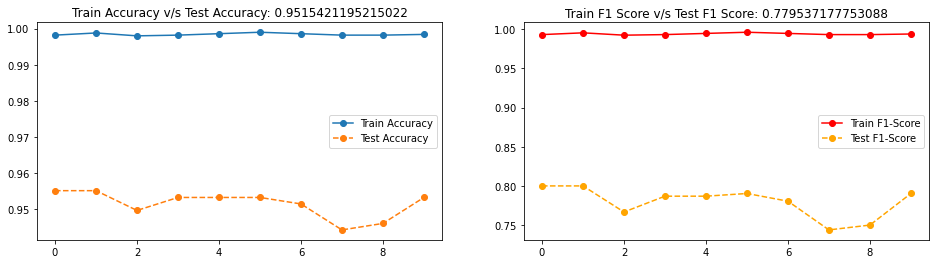

In [68]:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.title("Train Accuracy v/s Test Accuracy: %s" %(np.mean(svc_classif_test_accuracy)))
plt.plot(svc_classif_train_accuracy, marker = "o")
plt.plot(svc_classif_test_accuracy, marker = "o", linestyle = "--")
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.subplot(122)
plt.title("Train F1 Score v/s Test F1 Score: %s" %(np.mean(svc_classif_test_f1_score)))
plt.plot(svc_classif_train_f1_score, marker = "o", color = "r")
plt.plot(svc_classif_test_f1_score,  marker = "o", linestyle = "--", color = "orange")
plt.legend(["Train F1-Score", "Test F1-Score"])

## SGD Classifier

In [69]:
sgd_train_accuracy = []
sgd_test_accuracy = []
sgd_train_f1_score = []
sgd_test_f1_score = []

for train_idx, test_idx in kfold.split(scaled_x, scaled_y):
    x_train, x_test, y_train, y_test = scaled_x[train_idx], scaled_x[test_idx], scaled_y[train_idx], scaled_y[test_idx]
    sgd = SGDClassifier(random_state=42)
    sgd.fit(x_train, y_train)
    train_predict = sgd.predict(x_train)
    test_predict = sgd.predict(x_test)
    
    train_accu = sklearn.metrics.accuracy_score(y_train, train_predict)
    test_accu = sklearn.metrics.accuracy_score(y_test, test_predict)
    
    train_f1 = sklearn.metrics.f1_score(y_train, train_predict)
    test_f1 = sklearn.metrics.f1_score(y_test, test_predict)
    
    sgd_train_accuracy.append(train_accu)
    sgd_test_accuracy.append(test_accu)
    sgd_train_f1_score.append(train_f1)
    sgd_test_f1_score.append(test_f1)

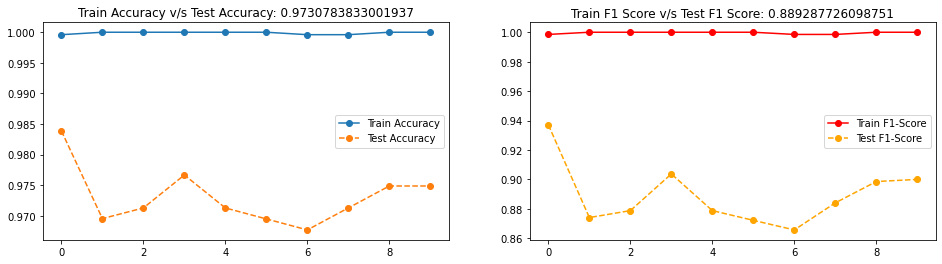

In [70]:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.title("Train Accuracy v/s Test Accuracy: %s" %(np.mean(sgd_test_accuracy)))
plt.plot(sgd_train_accuracy, marker = "o")
plt.plot(sgd_test_accuracy, marker = "o", linestyle = "--")
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.subplot(122)
plt.title("Train F1 Score v/s Test F1 Score: %s" %(np.mean(sgd_test_f1_score)))
plt.plot(sgd_train_f1_score, marker = "o", color = "r")
plt.plot(sgd_test_f1_score,  marker = "o", linestyle = "--", color = "orange")
plt.legend(["Train F1-Score", "Test F1-Score"])

## Passive Aggressive Classifier

In [71]:
pa_classif_train_accuracy = []
pa_classif_test_accuracy = []
pa_classif_train_f1_score = []
pa_classif_test_f1_score = []

for train_idx, test_idx in kfold.split(scaled_x, scaled_y):
    x_train, x_test, y_train, y_test = scaled_x[train_idx], scaled_x[test_idx], scaled_y[train_idx], scaled_y[test_idx]
    pa_classif = PassiveAggressiveClassifier(random_state=42)
    pa_classif.fit(x_train, y_train)
    train_predict = pa_classif.predict(x_train)
    test_predict = pa_classif.predict(x_test)
    
    train_accu = sklearn.metrics.accuracy_score(y_train, train_predict)
    test_accu = sklearn.metrics.accuracy_score(y_test, test_predict)
    
    train_f1 = sklearn.metrics.f1_score(y_train, train_predict)
    test_f1 = sklearn.metrics.f1_score(y_test, test_predict)
    
    pa_classif_train_accuracy.append(train_accu)
    pa_classif_test_accuracy.append(test_accu)
    pa_classif_train_f1_score.append(train_f1)
    pa_classif_test_f1_score.append(test_f1)

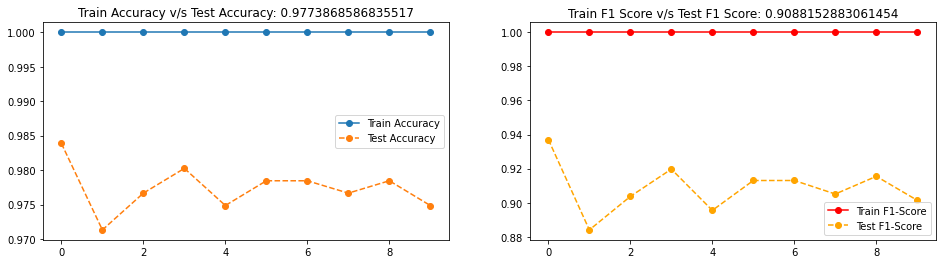

In [72]:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.title("Train Accuracy v/s Test Accuracy: %s" %(np.mean(pa_classif_test_accuracy)))
plt.plot(pa_classif_train_accuracy, marker = "o")
plt.plot(pa_classif_test_accuracy, marker = "o", linestyle = "--")
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.subplot(122)
plt.title("Train F1 Score v/s Test F1 Score: %s" %(np.mean(pa_classif_test_f1_score)))
plt.plot(pa_classif_train_f1_score, marker = "o", color = "r")
plt.plot(pa_classif_test_f1_score,  marker = "o", linestyle = "--", color = "orange")
plt.legend(["Train F1-Score", "Test F1-Score"])

## Ridge Classifier

In [73]:
ridge_classif_train_accuracy = []
ridge_classif_test_accuracy = []
ridge_classif_train_f1_score = []
ridge_classif_test_f1_score = []

for train_idx, test_idx in kfold.split(scaled_x, scaled_y):
    x_train, x_test, y_train, y_test = scaled_x[train_idx], scaled_x[test_idx], scaled_y[train_idx], scaled_y[test_idx]
    ridge_classif = RidgeClassifier(random_state=42)
    ridge_classif.fit(x_train, y_train)
    train_predict = ridge_classif.predict(x_train)
    test_predict = ridge_classif.predict(x_test)
    
    train_accu = sklearn.metrics.accuracy_score(y_train, train_predict)
    test_accu = sklearn.metrics.accuracy_score(y_test, test_predict)
    
    train_f1 = sklearn.metrics.f1_score(y_train, train_predict)
    test_f1 = sklearn.metrics.f1_score(y_test, test_predict)
    
    ridge_classif_train_accuracy.append(train_accu)
    ridge_classif_test_accuracy.append(test_accu)
    ridge_classif_train_f1_score.append(train_f1)
    ridge_classif_test_f1_score.append(test_f1)

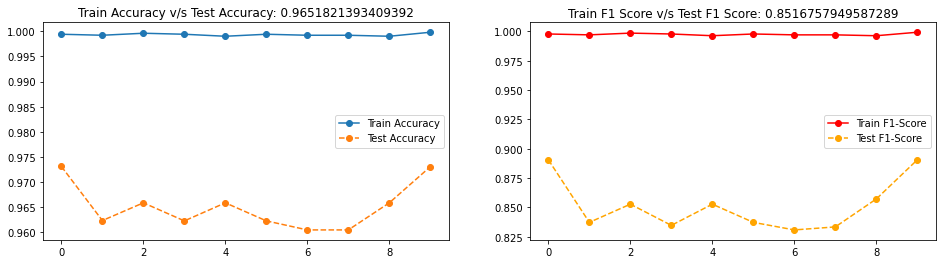

In [74]:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.title("Train Accuracy v/s Test Accuracy: %s" %(np.mean(ridge_classif_test_accuracy)))
plt.plot(ridge_classif_train_accuracy, marker = "o")
plt.plot(ridge_classif_test_accuracy, marker = "o", linestyle = "--")
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.subplot(122)
plt.title("Train F1 Score v/s Test F1 Score: %s" %(np.mean(ridge_classif_test_f1_score)))
plt.plot(ridge_classif_train_f1_score, marker = "o", color = "r")
plt.plot(ridge_classif_test_f1_score,  marker = "o", linestyle = "--", color = "orange")
plt.legend(["Train F1-Score", "Test F1-Score"])

In [75]:
train_accuracy_score = pd.DataFrame([lr_train_accuracy, knn_train_accuracy, dt_train_accuracy, lgbm_train_accuracy, xgb_train_accuracy, multinom_train_accuracy, svc_classif_train_accuracy, sgd_train_accuracy, pa_classif_train_accuracy, ridge_classif_train_accuracy], index = ["Logistic", "KNN", "DecisionTree", "LightGBM", "XGB", "Multinom Bayes", "SVM", "SGD", "Passive Classifier", "Ridge"])
test_accuracy_score = pd.DataFrame([lr_test_accuracy, knn_test_accuracy, dt_test_accuracy, lgbm_test_accuracy, xgb_test_accuracy, multinom_test_accuracy, svc_classif_test_accuracy, sgd_test_accuracy, pa_classif_test_accuracy, ridge_classif_train_accuracy], index = ["Logistic", "KNN", "DecisionTree", "LightGBM", "XGB", "Multinom Bayes", "SVM", "SGD", "Passive Classifier", "Ridge"])
train_f1_score = pd.DataFrame([lr_train_f1_score, knn_train_f1_score, dt_train_f1_score, lgbm_train_f1_score, xgb_train_f1_score, multinom_train_f1_score, svc_classif_train_f1_score, sgd_train_f1_score, pa_classif_train_f1_score, ridge_classif_train_accuracy], index = ["Logistic", "KNN", "DecisionTree", "LightGBM", "XGB", "Multinom Bayes", "SVM", "SGD", "Passive Classifier", "Ridge"])
test_f1_score = pd.DataFrame([lr_test_f1_score, knn_test_f1_score, dt_test_f1_score, lgbm_test_f1_score, xgb_test_f1_score, multinom_test_f1_score, svc_classif_test_f1_score, sgd_test_f1_score, pa_classif_test_f1_score, ridge_classif_train_f1_score], index = ["Logistic", "KNN", "DecisionTree", "LightGBM", "XGB", "Multinom Bayes", "SVM", "SGD", "Passive Classifier", "Ridge"])

In [76]:
from IPython.display import display, HTML

In [77]:
CSS = """
.output {
    flex-direction: col;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [78]:
display(train_accuracy_score.style.background_gradient(cmap = "Blues"), display_id = 'train_acc')
display(test_accuracy_score.style.background_gradient(cmap = "Blues"), display_id = 'test_acc')
display(train_f1_score.style.background_gradient(cmap = "Blues"), display_id = 'train_f1_score')
display(test_f1_score.style.background_gradient(cmap = "Blues"), display_id = 'test_f1_score')

,0,1,2,3,4,5,6,7,8,9
Logistic,0.943359,0.941364,0.943370,0.943170,0.942971,0.942173,0.944367,0.944766,0.944367,0.942971
KNN,0.912046,0.912246,0.912263,0.912463,0.911665,0.910867,0.914457,0.914058,0.914457,0.913061
DecisionTree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
LightGBM,0.994815,0.996410,0.995214,0.995214,0.995813,0.996211,0.995613,0.994816,0.996012,0.995015
XGB,0.988632,0.990826,0.988634,0.989831,0.989232,0.989831,0.989033,0.989232,0.989831,0.990030
Multinom Bayes,0.971081,0.973275,0.973081,0.972881,0.971884,0.973280,0.972483,0.971486,0.973081,0.971884
SVM,0.998205,0.998803,0.998006,0.998205,0.998604,0.999003,0.998604,0.998205,0.998205,0.998405
SGD,0.999601,1.000000,1.000000,1.000000,1.000000,1.000000,0.999601,0.999601,1.000000,1.000000
Passive Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Ridge,0.999402,0.999202,0.999601,0.999402,0.999003,0.999402,0.999202,0.999202,0.999003,0.999801


,0,1,2,3,4,5,6,7,8,9
Logistic,0.928315,0.935484,0.913824,0.919210,0.919210,0.931777,0.917415,0.922801,0.917415,0.929982
KNN,0.894265,0.894265,0.897666,0.899461,0.895871,0.901257,0.894075,0.899461,0.899461,0.908438
DecisionTree,0.965950,0.955197,0.965889,0.962298,0.962298,0.964093,0.958707,0.958707,0.955117,0.967684
LightGBM,0.971326,0.969534,0.974865,0.980251,0.980251,0.971275,0.969479,0.967684,0.962298,0.974865
XGB,0.978495,0.971326,0.982047,0.976661,0.973070,0.974865,0.962298,0.964093,0.969479,0.978456
Multinom Bayes,0.946237,0.953405,0.937163,0.949731,0.940754,0.944345,0.940754,0.944345,0.938959,0.951526
SVM,0.955197,0.955197,0.949731,0.953321,0.953321,0.953321,0.951526,0.944345,0.946140,0.953321
SGD,0.983871,0.969534,0.971275,0.976661,0.971275,0.969479,0.967684,0.971275,0.974865,0.974865
Passive Classifier,0.983871,0.971326,0.976661,0.980251,0.974865,0.978456,0.978456,0.976661,0.978456,0.974865
Ridge,0.999402,0.999202,0.999601,0.999402,0.999003,0.999402,0.999202,0.999202,0.999003,0.999801


,0,1,2,3,4,5,6,7,8,9
Logistic,0.733083,0.721591,0.734082,0.732896,0.731707,0.726415,0.739008,0.741363,0.739496,0.731203
KNN,0.511628,0.513274,0.514349,0.515987,0.509413,0.501672,0.531148,0.527930,0.531148,0.519824
DecisionTree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
LightGBM,0.980273,0.986425,0.981846,0.981873,0.984151,0.985660,0.983359,0.980273,0.984894,0.981046
XGB,0.955780,0.964561,0.955848,0.960618,0.958269,0.960618,0.957331,0.958269,0.960557,0.961479
Multinom Bayes,0.879066,0.889256,0.888522,0.887603,0.882988,0.889256,0.885572,0.880933,0.888337,0.882793
SVM,0.993258,0.995516,0.992515,0.993269,0.994772,0.996266,0.994764,0.993258,0.993258,0.994012
SGD,0.998514,1.000000,1.000000,1.000000,1.000000,1.000000,0.998514,0.998514,1.000000,1.000000
Passive Classifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Ridge,0.999402,0.999202,0.999601,0.999402,0.999003,0.999402,0.999202,0.999202,0.999003,0.999801


,0,1,2,3,4,5,6,7,8,9
Logistic,0.642857,0.684211,0.520000,0.563107,0.563107,0.660714,0.566038,0.612613,0.557692,0.648649
KNN,0.351648,0.351648,0.373626,0.391304,0.355556,0.421053,0.351648,0.404255,0.404255,0.484848
DecisionTree,0.875817,0.827586,0.872483,0.857143,0.848921,0.855072,0.836879,0.845638,0.829932,0.880000
LightGBM,0.893333,0.884354,0.901408,0.921986,0.920863,0.884058,0.877698,0.869565,0.853147,0.905405
XGB,0.918919,0.888889,0.927536,0.907801,0.890511,0.897059,0.846715,0.857143,0.882759,0.914286
Multinom Bayes,0.750000,0.790323,0.690265,0.766667,0.713043,0.739496,0.717949,0.739496,0.706897,0.780488
SVM,0.800000,0.800000,0.766667,0.786885,0.786885,0.790323,0.780488,0.743802,0.750000,0.790323
SGD,0.937063,0.874074,0.878788,0.903704,0.878788,0.872180,0.865672,0.884058,0.898551,0.900000
Passive Classifier,0.937063,0.884058,0.903704,0.919708,0.895522,0.913043,0.913043,0.905109,0.915493,0.901408
Ridge,0.997770,0.997028,0.998512,0.997766,0.996288,0.997773,0.997024,0.997024,0.996283,0.999255


<DisplayHandle display_id=test_f1_score>

In [79]:
model_avg_scores = {'model': [], "train_accuracy": [], "test_accuracy": [], "train_f1": [], "test_f1": []}

for idx1, row1 in train_accuracy_score.iterrows():
    model_avg_scores["model"].append(idx1)
    model_avg_scores['train_accuracy'].append(np.mean(row1))
    
for idx2, row2 in test_accuracy_score.iterrows():
    model_avg_scores['test_accuracy'].append(np.mean(row2))
    
for idx3, row3 in train_f1_score.iterrows():
    model_avg_scores['train_f1'].append(np.mean(row3))
    
for idx4, row4 in test_f1_score.iterrows():
    model_avg_scores['test_f1'].append(np.mean(row4))

In [80]:
model_score_df = pd.DataFrame(model_avg_scores)

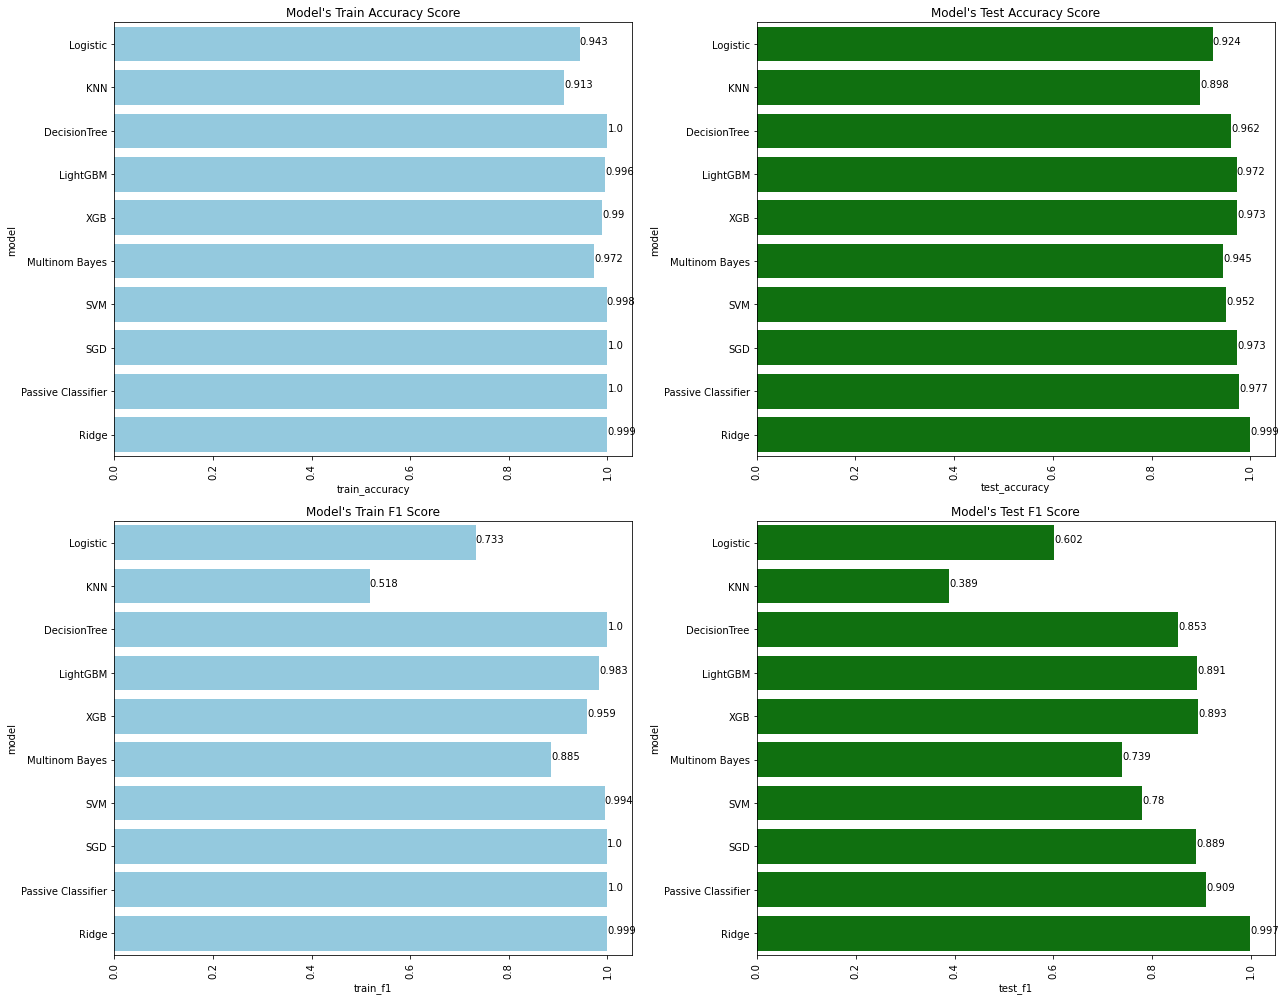

In [81]:
plt.figure(figsize=(18,14))
plt.subplot(221)
plt.title("Model's Train Accuracy Score")
sns.barplot(x = model_score_df["train_accuracy"], y = model_score_df.model, color = "skyblue")
plt.xticks(rotation = "90")
for idx, val in enumerate(model_score_df.train_accuracy):
    plt.text(val, idx, round(float(val),3))
plt.subplot(222)
plt.title("Model's Test Accuracy Score")
sns.barplot(x = model_score_df["test_accuracy"], y = model_score_df.model, color = "g")
plt.xticks(rotation = "90")
for idx, val in enumerate(model_score_df.test_accuracy):
    plt.text(val, idx, round(float(val),3))
plt.subplot(223)
plt.title("Model's Train F1 Score")
sns.barplot(x = model_score_df["train_f1"], y = model_score_df.model, color = "skyblue")
plt.xticks(rotation = "90")
for idx, val in enumerate(model_score_df.train_f1):
    plt.text(val, idx, round(float(val),3))
plt.subplot(224)
plt.title("Model's Test F1 Score")
sns.barplot(x = model_score_df["test_f1"], y = model_score_df.model, color = "g")
plt.xticks(rotation = "90")
for idx, val in enumerate(model_score_df.test_f1):
    plt.text(val, idx, round(float(val),3))
plt.tight_layout()
plt.show()

As you can see above, the KNN algorithm is the worst model when it comes to handling the imbalanced dataset. If we take a look at the accuracy of the KNN is fairly decent but if we take a look at the F1 score, we can see the model is not performing good so we can say that in the presence of class imbalance, the accuracy would not be an ideal metric to look at but I have added to see the metric comparison in case of imabalance dataset.

If I have to choose any 2-3 algorithm for our hyperparameter optimization, I will prefer Ridge Classifier & Passive Classifier for our next step.

In [82]:
model_score_df.style.background_gradient(cmap = "Blues_r")

,model,train_accuracy,test_accuracy,train_f1,test_f1
0,Logistic,0.943288,0.923543,0.733084,0.601899
1,KNN,0.912758,0.898422,0.517637,0.388984
2,DecisionTree,1.000000,0.961594,1.000000,0.852947
3,LightGBM,0.995513,0.972183,0.982980,0.891182
4,XGB,0.989511,0.973079,0.959333,0.893162
5,Multinom Bayes,0.972442,0.944722,0.885433,0.739462
6,SVM,0.998425,0.951542,0.994089,0.779537
7,SGD,0.999880,0.973078,0.999554,0.889288
8,Passive Classifier,1.000000,0.977387,1.000000,0.908815
9,Ridge,0.999322,0.999322,0.999322,0.997472


## Hyperparameter Optimization 

Now in this section we're going to perform hyperparameter optimization to see the performance of our both the models if we can improve it further by doing manual iteration into our model's parameters.

In [83]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

### Passive Aggressive Classifier Hyperparameter Tuning with Balanced Weight

In [ ]:
# pa_weights = np.linspace(0.0,0.99,200)
# [{0:x, 1:1.0-x} for x in pa_weights]

In [241]:
pa_param_grid = {
    "C": [0.0001, 0.001, 0.01, 1.0, 10, 100],
    "fit_intercept": [True, False],
    "max_iter": [100, 500, 1000],
    "tol": [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 1.0, 0.0005],
    "shuffle": [True, False],
    "class_weight": ["balanced"]
}

In [242]:
pa_classif = PassiveAggressiveClassifier(random_state=42, verbose = 0)

In [243]:
random_search = RandomizedSearchCV(estimator = pa_classif, param_distributions = pa_param_grid, scoring = "f1", cv = 10, random_state = 42)

In [244]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size = 0.30, random_state = 42)

In [245]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=PassiveAggressiveClassifier(random_state=42),
                   param_distributions={'C': [0.0001, 0.001, 0.01, 1.0, 10,
                                              100],
                                        'class_weight': ['balanced'],
                                        'fit_intercept': [True, False],
                                        'max_iter': [100, 500, 1000],
                                        'shuffle': [True, False],
                                        'tol': [0.0001, 0.001, 0.005, 0.01,
                                                0.05, 0.1, 1.0, 0.0005]},
                   random_state=42, scoring='f1')

In [246]:
random_search.best_score_

0.9203250444488592

In [247]:
random_search.best_estimator_

PassiveAggressiveClassifier(C=100, class_weight='balanced', max_iter=500,
                            random_state=42, tol=0.005)

Text(0, 0.5, 'Mean Test Score')

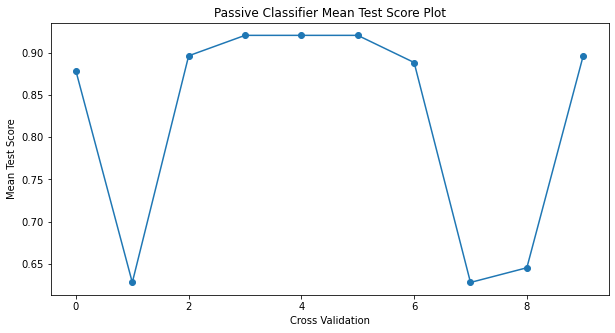

In [280]:
plt.figure(figsize=(10,5))
plt.title("Passive Classifier Mean Test Score Plot")
plt.plot(random_search.cv_results_["mean_test_score"], marker = "o")
plt.xlabel("Cross Validation")
plt.ylabel("Mean Test Score")

In [249]:
random_search.cv_results_["mean_test_score"]

array([0.87814679, 0.62821449, 0.89615443, 0.92032504, 0.92032504,
       0.92032504, 0.8882203 , 0.62821449, 0.64556693, 0.89615443])

In [252]:
y_train_predict = random_search.predict(x_train)

In [253]:
y_test_predict = random_search.predict(x_test)

In [265]:
evaluate_model(y_train, y_test, y_train_predict, y_test_predict)

*******Accuracy*******

Train Accuracy: 1.0
Test Accuracy: 0.9742822966507177


Train Error: 0.0
Test Error: 0.02571770334928225

******* F1-Score **********


Train F1-Score: 1.0
Test F1-Score: 0.8973747016706444

********* Log Loss ***********


Train Log Loss: 9.992007221626413e-16
Test Log Loss: 0.8882637441090451

********* Classification Report *********


Train Classification Report:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    3372.0  528.0       1.0     3900.0        3900.0
Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.978940    0.940000  0.974282     0.959470      0.973840
recall        0.991741    0.858447  0.974282     0.925094      0.974282
f1-score      0.985299    0.897375  0.974282     0.941337     

### Ridge Classifier Hyperparameter Tuning

In [272]:
ridge_params = {
    'alpha': [1.0,0.1,0.001,0.0001,0.5,0.005,0.0005,10,25,50,75],
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'tol': [0.001,0.01,0.1,0.005,0.05,0.5,0.2,0.02,0.002],
    'class_weight': ['balanced'],
    'max_iter': [100,500,1000, False]
}

In [273]:
ridge_classifier_hp = RidgeClassifier(random_state = 0)

In [274]:
ridge_random_search = RandomizedSearchCV(estimator=ridge_classifier_hp, param_distributions=ridge_params, cv = 10, scoring = 'f1', random_state = 42, verbose = 0)

In [275]:
ridge_random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RidgeClassifier(random_state=0),
                   param_distributions={'alpha': [1.0, 0.1, 0.001, 0.0001, 0.5,
                                                  0.005, 0.0005, 10, 25, 50,
                                                  75],
                                        'class_weight': ['balanced'],
                                        'fit_intercept': [True, False],
                                        'max_iter': [100, 500, 1000, False],
                                        'normalize': [True, False],
                                        'tol': [0.001, 0.01, 0.1, 0.005, 0.05,
                                                0.5, 0.2, 0.02, 0.002]},
                   random_state=42, scoring='f1')

In [276]:
ridge_random_search.best_estimator_

RidgeClassifier(alpha=75, class_weight='balanced', max_iter=500, normalize=True,
                random_state=0, tol=0.01)

In [277]:
ridge_random_search.best_score_

0.9189227153167085

In [279]:
ridge_random_search.cv_results_["mean_test_score"]

array([0.82616492, 0.91892272, 0.90047246, 0.76374576, 0.81396947,
       0.81396947, 0.86267003, 0.91483345, 0.03145853, 0.64556693])

Text(0, 0.5, 'Mean Test Score')

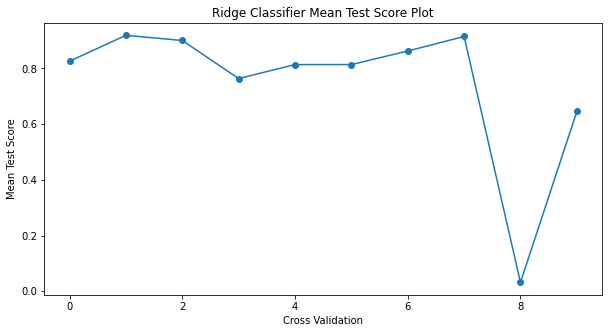

In [281]:
plt.figure(figsize=(10,5))
plt.title("Ridge Classifier Mean Test Score Plot")
plt.plot(ridge_random_search.cv_results_["mean_test_score"], marker = "o")
plt.xlabel("Cross Validation")
plt.ylabel("Mean Test Score")

In [282]:
ridge_ytrain_predict = ridge_random_search.predict(x_train)
ridge_ytest_predict = ridge_random_search.predict(x_test)

In [283]:
evaluate_model(y_train, y_test, ridge_ytrain_predict, ridge_ytest_predict)

*******Accuracy*******

Train Accuracy: 0.9994871794871795
Test Accuracy: 0.9802631578947368


Train Error: 0.0005128205128205332
Test Error: 0.019736842105263164

******* F1-Score **********


Train F1-Score: 0.998109640831758
Test F1-Score: 0.9200968523002421

********* Log Loss ***********


Train Log Loss: 0.01771260307299632
Test Log Loss: 0.6816882891278557

********* Classification Report *********


Train Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     1.000000    0.996226  0.999487     0.998113      0.999489
recall        0.999407    1.000000  0.999487     0.999703      0.999487
f1-score      0.999703    0.998110  0.999487     0.998906      0.999488
support    3372.000000  528.000000  0.999487  3900.000000   3900.000000
Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.980379    0.979381  0.980263     0.979880      0.980248
recall        0.997247    0.

So based on the hyperparameter tuning, I can say that ridge classifier is performing slightly better when it comes to prediction and reducing the False Positive so I will be picking the Ridge Classifier to create my final model. Now, we are going to perform the Grid Search CV on the parameter that we've got from the randomized search cross validation.

### Grid Search Cross Validation - Ridge Classifier

In [ ]:
# RidgeClassifier(alpha=75, class_weight='balanced', max_iter=500, normalize=True,
#                 random_state=0, tol=0.01)

In [297]:
grid_params = {
    
    'alpha': [25,50,60,70,75,80,85],
    'max_iter': [400,420,450,480,500,550,600],
    'tol': [0.01,0.02,0.03,0.04,0.05]
}

In [298]:
ridge = RidgeClassifier(random_state=0, class_weight='balanced', normalize=True)

In [299]:
grid_search = GridSearchCV(estimator=ridge, param_grid = grid_params, scoring = 'f1', cv = 10)

In [300]:
best_model = grid_search.fit(x_train, y_train)

In [301]:
best_model.best_estimator_

RidgeClassifier(alpha=75, class_weight='balanced', max_iter=400, normalize=True,
                random_state=0, tol=0.03)

In [302]:
best_model.best_params_

{'alpha': 75, 'max_iter': 400, 'tol': 0.03}

In [303]:
best_model.best_score_

0.9200865719484701

Text(0, 0.5, 'Mean Test Score')

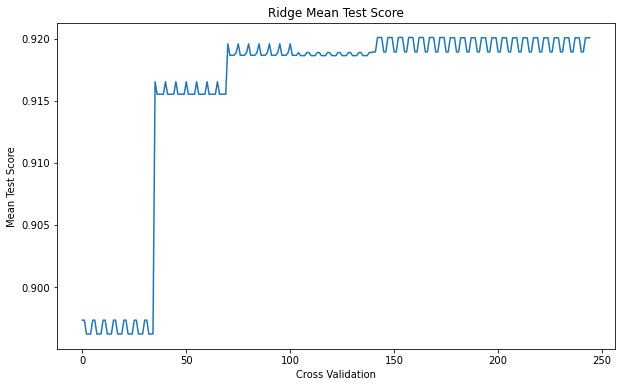

In [304]:
plt.figure(figsize=(10,6))
plt.title("Ridge Mean Test Score")
plt.plot(best_model.cv_results_["mean_test_score"])
plt.xlabel("Cross Validation")
plt.ylabel("Mean Test Score")

In [305]:
train_predict = best_model.predict(x_train)
test_predict = best_model.predict(x_test)

In [306]:
evaluate_model(y_train, y_test, train_predict, test_predict)

*******Accuracy*******

Train Accuracy: 0.9994871794871795
Test Accuracy: 0.9802631578947368


Train Error: 0.0005128205128205332
Test Error: 0.019736842105263164

******* F1-Score **********


Train F1-Score: 0.998109640831758
Test F1-Score: 0.9200968523002421

********* Log Loss ***********


Train Log Loss: 0.01771260307299632
Test Log Loss: 0.6816882891278557

********* Classification Report *********


Train Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     1.000000    0.996226  0.999487     0.998113      0.999489
recall        0.999407    1.000000  0.999487     0.999703      0.999487
f1-score      0.999703    0.998110  0.999487     0.998906      0.999488
support    3372.000000  528.000000  0.999487  3900.000000   3900.000000
Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.980379    0.979381  0.980263     0.979880      0.980248
recall        0.997247    0.

## Final Model

In [309]:
f_ridge =  RidgeClassifier(alpha=75, class_weight='balanced', max_iter=500, normalize=True, random_state=0, tol=0.01)

In [310]:
f_ridge.fit(x_train, y_train)

RidgeClassifier(alpha=75, class_weight='balanced', max_iter=500, normalize=True,
                random_state=0, tol=0.01)

In [311]:
train_final_prediction = f_ridge.predict(x_train)

In [312]:
test_final_prediction = f_ridge.predict(x_test)

In [328]:
train_predict_df = pd.DataFrame(train_final_prediction)
test_predict_df = pd.DataFrame(test_final_prediction)

In [361]:
final_prediction = train_predict_df.append(test_predict_df).reset_index().drop("index", axis = 1)

In [366]:
final_df = df.iloc[:, :2]

In [368]:
final_df["class_predict"] = final_prediction

In [374]:
class_mapping = {0: "ham", 1:"spam"}

In [377]:
final_df.class_predict = final_df.class_predict.map(class_mapping)

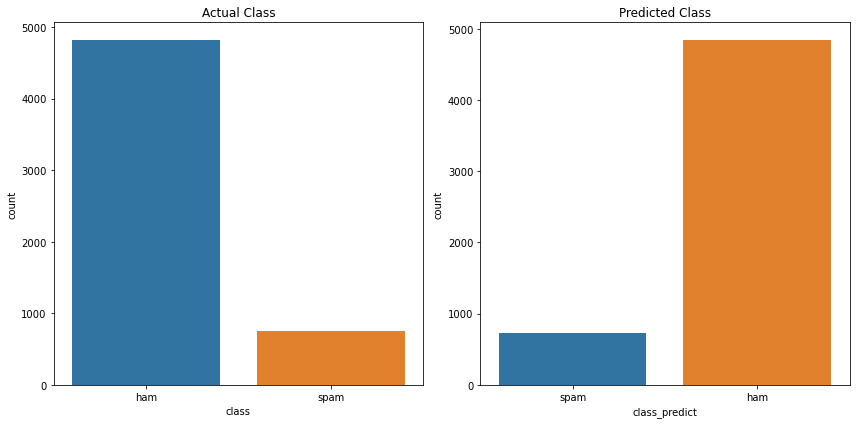

In [382]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.title("Actual Class")
sns.countplot(final_df["class"])
plt.subplot(122)
plt.title("Predicted Class")
sns.countplot(final_df["class_predict"])
plt.tight_layout()

In [383]:
final_df.to_csv("spam_submission.csv")

### I hope you liked this kernel..!!!!